In [228]:
#  Aluno: Joao Pedro Miranda Marques
#  Matricula 2017050495
#  UFMG
#
#  Problema das n rainhas em tabuleiro nxn
#  Solucao utilizando algoritmo evolutivo



#Bibliotecas

import random as rd
import numpy as np
import matplotlib.pyplot

In [211]:
#Inicializando populacao

crossover_rate = 1
mutation_rate = 0.8 

def init_population(_mu:int = 20, n:int = 8):
    population = []
    for i in range (_mu):
        population.append(rd.sample(range(n), n))
    return population

#pop = init_population(20, 8)
print(pop)


[[7, 5, 3, 6, 1, 4, 0, 2], [1, 2, 5, 7, 6, 4, 3, 0], [0, 3, 7, 6, 2, 1, 5, 4], [4, 1, 0, 5, 3, 2, 7, 6], [3, 7, 5, 6, 0, 2, 4, 1], [6, 5, 2, 0, 7, 3, 4, 1], [6, 2, 3, 4, 0, 7, 5, 1], [7, 0, 2, 5, 1, 6, 4, 3], [4, 0, 7, 3, 6, 5, 1, 2], [0, 3, 6, 5, 2, 7, 4, 1], [3, 0, 7, 4, 2, 1, 5, 6], [0, 3, 7, 4, 2, 6, 5, 1], [4, 6, 3, 7, 1, 2, 5, 0], [4, 7, 0, 1, 5, 2, 3, 6], [2, 7, 5, 4, 6, 0, 3, 1], [5, 7, 3, 4, 1, 0, 6, 2], [1, 6, 0, 5, 4, 3, 2, 7], [3, 2, 1, 6, 7, 0, 5, 4], [6, 4, 2, 7, 1, 5, 0, 3], [0, 1, 4, 7, 3, 6, 5, 2]]


In [212]:
#Funcao Objetivo

def fitness_nq(solution):
    xeques = 0
    for i in range(0,len(solution)):
        for j in range(0,len(solution)):
            if i!=j:
                if i-solution[i] == j-solution[j] or i+solution[i] == j+solution[j]:
                    xeques+=1
    return xeques

In [222]:
# loop principal do algoritmo evolutivo

def evolutionaryAlgorithm(_mu, n, generations, crossover_rate, mutation_rate):
    
    pop = init_population(20, 8) #initialise
    
    i_geracoes = 0
    medias = []
    generations = 100

    print("first population:")
    print (pop)
    print("first evaluation:")
    fitness = evaluation(pop) #evaluate
    print(fitness)


    while i_geracoes <= generations:
        subset_parents = selection(pop) #selecao dos individuos mais aptos para o cruzamento
    #    print("2 individuos mais aptos com relacao aos 5 aleatorios escolhidos")
    #    print(subset_parents)
        offspring = crossover(subset_parents, crossover_rate) #cruzamento dos pais
    #    print("cruzamento deles crossover")
    #    print(offspring)
        offspring_new = mutation(offspring,mutation_rate) #mutacao
    #    print("mutacao")
    #    print(offspring_new)
        pop = replacement(offspring_new, pop) #atualizacao da populacao
    #    print("nova populacao")
    #    print(pop)
        fitness = evaluation(pop) #fez uma nova avaliacao
    #    print("novo evaluation")
    #    print(fitness)

        medias.append(sum(fitness)/generations)

        i_geracoes += 1
        
    
    print("final population:")
    print(pop)
    print("final evaluation: ")
    print(fitness)

    matplotlib.pyplot.xlabel('Interacoes')
    matplotlib.pyplot.ylabel('Media de cheques em uma geracao')
    matplotlib.pyplot.plot(medias)
    
    return pop

In [214]:
def evaluation(pop): 
    #avalia a quantidade de xeques da geracao
    pop_fitness = [fitness_nq(each_solution) for each_solution in pop]
#    print(pop_fitness)
    return pop_fitness

In [215]:
def selection(pop):
#retorna dentre 5 solucoes aleatorias as duas melhores.
    _aux = 5
    aleatorios = []

    for i in range (_aux):
        aleatorios.append(rd.choice(pop))

    qnt_xeques = [fitness_nq(each_solution) for each_solution in aleatorios]

    m1, m2 = float('inf'), float('inf')

    for x in qnt_xeques:
        if x <= m1:
            m2 = m1
            m1 = x
            indice1 = qnt_xeques.index(m1)
            indice2 = qnt_xeques.index(m2)

    for x in qnt_xeques:
        if x <= m2 and qnt_xeques.index(m1) != qnt_xeques.index(x):
            m2 = x
            indice2 = qnt_xeques.index(m2)
            
    subset_parents = []
    subset_parents.append(aleatorios[indice1])
    subset_parents.append(aleatorios[indice2])
    
#    print("aleatorios: ", aleatorios)
#    print("indice 1 :", indice1)
#    print("indice 2 :", indice2)

    return subset_parents


In [216]:
def crossover(subset_parents, crossover_rate):
#retorna um subset (dois individuos) como resultado dos cruzamento dos pais.
    lista1 = subset_parents[0]
    lista2 = subset_parents[1]

    resp1 = []
    resp2 = []

    resp1 = lista1[0:4] + lista2[4:8]
    resp2 = lista2[0:4] + lista1[4:8]

    offspring = (resp1, resp2)

    return offspring

In [217]:
def mutation(offspring,mutation_rate):
#retorna um subset (dois individuos) como resultado da mutacao dos filhos.
    lista1 = offspring[0]
    lista2 = offspring[1]

    lista1[rd.randint(0,7)] = rd.randint(0,7)
    lista2[rd.randint(0,7)] = rd.randint(0,7)

    offspring_new = (lista1, lista2)
    
    return offspring_new

In [218]:
def replacement(offspring_new, pop):
#Atualiza a lista de populacao substituindo os dois piores individuos pelos dois que fazem parte do subset offspring_new.
    pop_fitness = [fitness_nq(each_solution) for each_solution in pop]
    maiornmr = max(pop_fitness)
    index1 = pop_fitness.index(maiornmr)
#    print("maior numero e respectivo indice: ", maiornmr, index1)
    for x in pop_fitness:
        if x >= 0 and x < maiornmr:
            segundomaior = x
            index2 = pop_fitness.index(segundomaior)


    pop[index1] = offspring_new[0]
    pop[index2] = offspring_new[1]
    
    return pop

first population:
[[2, 5, 0, 4, 3, 7, 1, 6], [2, 3, 1, 0, 4, 6, 7, 5], [4, 2, 1, 3, 7, 6, 0, 5], [3, 2, 4, 5, 6, 0, 1, 7], [5, 1, 2, 3, 7, 0, 6, 4], [4, 1, 2, 7, 3, 5, 0, 6], [5, 6, 0, 2, 3, 7, 4, 1], [0, 4, 3, 2, 5, 6, 1, 7], [1, 4, 6, 3, 2, 7, 0, 5], [6, 4, 1, 3, 5, 7, 2, 0], [5, 7, 4, 3, 6, 2, 1, 0], [1, 5, 2, 0, 6, 3, 7, 4], [2, 7, 1, 3, 5, 0, 4, 6], [5, 4, 7, 0, 1, 6, 3, 2], [6, 4, 2, 5, 1, 3, 7, 0], [6, 1, 2, 7, 5, 3, 4, 0], [5, 4, 0, 6, 7, 3, 1, 2], [4, 2, 7, 0, 6, 3, 5, 1], [7, 2, 5, 1, 3, 4, 6, 0], [3, 7, 4, 1, 0, 5, 6, 2]]
first evaluation:
[12, 6, 8, 10, 16, 14, 10, 14, 10, 2, 10, 4, 2, 20, 4, 6, 14, 4, 14, 4]
final population:
[[2, 6, 6, 0, 7, 0, 4, 6], [2, 6, 6, 0, 7, 1, 4, 6], [2, 6, 6, 0, 5, 0, 4, 6], [2, 6, 4, 0, 5, 0, 4, 6], [2, 6, 6, 0, 5, 1, 4, 4], [1, 6, 6, 0, 5, 1, 4, 6], [2, 1, 6, 0, 7, 1, 4, 6], [2, 0, 6, 0, 5, 1, 4, 6], [7, 6, 6, 0, 5, 0, 4, 6], [2, 6, 6, 0, 7, 1, 4, 6], [4, 6, 6, 0, 7, 1, 4, 6], [2, 6, 6, 0, 7, 4, 4, 6], [2, 6, 6, 0, 7, 4, 4, 6], [2, 6, 6, 0, 7

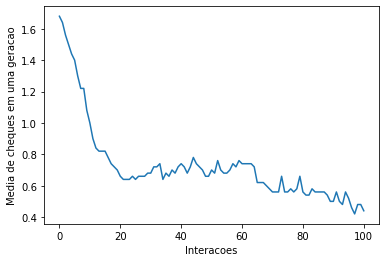

In [227]:
#    evolutionaryAlgorithm(_mu, n, generations, crossover_rate, mutation_rate)

medias = evolutionaryAlgorithm(20, 8, 20, 1, 0.8)